In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, List, Tuple, Optional

In [45]:
def plot_pareto_curve(
    baseline_data: Tuple[float, float], 
    energy_data: List[Tuple[float, float]] = [],
    l1_data: List[Tuple[float, float]] = [],
    ppce_data: List[Tuple[float, float]] = [],
    rrr_data: List[Tuple[float, float]] = [],
    x_label: str = 'F1 Score (%)', 
    y_label: str = 'EPG Score (%)', 
    title: str = '', 
    save_path: Optional[str] = None, 
    figsize: Tuple[int, int] = (10, 6),
    set_xlim: Optional[Tuple[float, float]] = None,
    set_ylim: Optional[Tuple[float, float]] = None,
    step_size_xticks: Optional[int] = None,
    step_size_yticks: Optional[int] = None,
    hide_y_ticks: bool = False,
    hide_x_ticks: bool = False,
    fontsize: int = 20,
    attribution_method: str = "IxG"
    ) -> None:
    """
    Plots a Pareto curve with given data points.

    Args:
        baseline_data (Tuple[float, float]): A tuple containing x and y coordinates for the baseline point.
        energy_data (List[Tuple[float, float]]): A list of tuples containing x and y coordinates for the energy data points.
        l1_data (List[Tuple[float, float]]): A list of tuples containing x and y coordinates for the L1 data points.
        ppce_data (List[Tuple[float, float]]): A list of tuples containing x and y coordinates for the PPCE data points.
        rrr_data (List[Tuple[float, float]]): A list of tuples containing x and y coordinates for the RRR* data points.
        x_label (str, optional): Label for the x-axis. Defaults to 'F1 Score (%)'.
        y_label (str, optional): Label for the y-axis. Defaults to 'EPG Score (%)'.
        title (str, optional): Title of the plot. Defaults to 'Pareto Curve'.
        save_path (Optional[str], optional): Path to save the plot image. If None, the plot is displayed. Defaults to None.
        figsize (Tuple[int, int], optional): Figure size. Defaults to (10, 6).

    Returns:
        None
    """
    
    fig, ax = plt.subplots(figsize=figsize)

    # Helper function for plotting data points and lines
    def plot_data(data, marker, color, label):
        if data:
            x, y = zip(*data)
            ax.scatter(x, y, marker=marker, color=color, label=label, s=fontsize*10, edgecolors='black', zorder=3)
            ax.plot(x, y, color=color, linestyle='--')

    # Plot each dataset
    plot_data(energy_data, 'o', '#FF006F', 'Energy')
    plot_data(l1_data, 'v', '#00E49F', 'L1')
    plot_data(ppce_data, 'p', '#FFD562', 'PPCE')
    plot_data(rrr_data, 'D', '#008AB3', 'RRR*')

    # Plot Baseline
    ax.plot(baseline_data[0], baseline_data[1], marker='X', color='white', markersize=fontsize, markeredgewidth=2, markeredgecolor='black', label='Baseline', zorder=2)

    # Find the best limits for the plot
    x_values = [x for data in [energy_data, l1_data, ppce_data, rrr_data] for x, y in data] + [baseline_data[0]]
    y_values = [y for data in [energy_data, l1_data, ppce_data, rrr_data] for x, y in data] + [baseline_data[1]]
    x_min, x_max = min(x_values), max(x_values)
    y_min, y_max = min(y_values), max(y_values)

    # Set the limits with some padding
    x_pad = (x_max - x_min) * 0.15
    y_pad = (y_max - y_min) * 0.15

    if set_xlim:
        ax.set_xlim(set_xlim[0], set_xlim[1])

    else:
        ax.set_xlim(x_min - x_pad, x_max + x_pad)

    if set_ylim:
        ax.set_ylim(set_ylim[0], set_ylim[1])

    else:
        ax.set_ylim(y_min - y_pad, y_max + y_pad)

    # Dominated region (gray)
    ax.plot([0, baseline_data[0]], [baseline_data[1], baseline_data[1]], '--', color='gray', alpha=0.5, zorder=1)
    ax.plot([baseline_data[0], baseline_data[0]], [-20, baseline_data[1]], '--', color='gray', alpha=0.5, zorder=1)
    ax.fill_between([baseline_data[0], -20], [baseline_data[1], baseline_data[1]], [-20, -20], color='gray', alpha=0.1, zorder=1)
    
    # Dominating region (green)
    ax.plot([baseline_data[0], 120], [baseline_data[1], baseline_data[1]], '--', color='green', alpha=0.5, zorder=1)
    ax.plot([baseline_data[0], baseline_data[0]], [120, baseline_data[1]], '--', color='green', alpha=0.5, zorder=1)
    ax.fill_between([120, baseline_data[0]], [baseline_data[1], baseline_data[1]], [120, 120], color='green', alpha=0.1, zorder=1)

    # # Place text using axes fraction
    # ax.text(0.015, 0.04, 'Dominated', transform=ax.transAxes, fontsize=10, color='gray', alpha=1, fontstyle='italic')
    # ax.text(0.98, 0.8, 'Dominating', transform=ax.transAxes, fontsize=10, color='green', alpha=1, fontstyle='italic', rotation=90, ha='right')

    # Place text using axes fraction
    ax.text(0.015, 0.05, 'Dominated', transform=ax.transAxes, fontsize=15, color='gray', alpha=1, fontstyle='italic')
    ax.text(0.02, 0.77, attribution_method, transform=ax.transAxes, fontsize=fontsize + 6, color='darkblue', alpha=1)
    ax.text(0.99, 0.56, 'Dominating', transform=ax.transAxes, fontsize=15, color='green', alpha=1, fontstyle='italic', rotation=90, ha='right')

    # Legend, Axes, and Labels
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=5, fancybox=True, shadow=True, fontsize=fontsize, columnspacing=0, handletextpad=0.0)

    if not hide_x_ticks:
        ax.set_xlabel(x_label, fontsize=fontsize)
        ax.tick_params(axis='x', labelsize=fontsize, length=0)
    else:
        # Hide x-axis tick labels
        ax.set_xlabel('')
        # Make the x-axis ticks white
        ax.tick_params(axis='x', labelsize=fontsize, colors='white', length=0)

    if not hide_y_ticks:
        ax.set_ylabel(y_label, fontsize=fontsize)
        ax.tick_params(axis='y', labelsize=fontsize, length=0)
    else:
        # Hide y-axis tick labels
        ax.set_ylabel('')
        ax.tick_params(axis='y', labelsize=fontsize, colors='white', length=0)

    if step_size_xticks:
        ax.xaxis.set_major_locator(plt.MultipleLocator(step_size_xticks))
    else:
        ax.xaxis.set_major_locator(plt.MultipleLocator(5))


    if step_size_yticks:
        ax.yaxis.set_major_locator(plt.MultipleLocator(step_size_yticks))
    else:
        ax.yaxis.set_major_locator(plt.MultipleLocator(5))

            
    ax.set_title(title, fontsize=16, fontstyle='italic')
    ax.grid(True)

    # Adjust layout for consistent PNG height
    plt.tight_layout()

    # Save or show plot depending on save_path
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, bbox_inches='tight')

    plt.show()

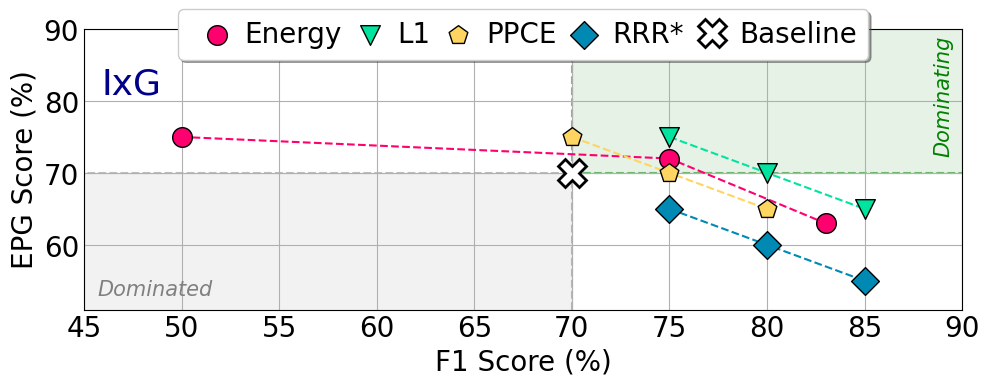

In [46]:
# Example usage
plot_pareto_curve(
    baseline_data=(70, 70),
    energy_data=[(50, 75), (75, 72), (83, 63)],
    l1_data=[(75, 75), (80, 70), (85, 65)],
    ppce_data=[(70, 75), (75, 70), (80, 65)],
    rrr_data=[(75, 65), (80, 60), (85, 55)],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='',
    figsize=(10, 4),
    hide_y_ticks=False,
    hide_x_ticks=False,
    step_size_yticks=10,
    set_xlim=(45, 90),
    set_ylim=(51, 90),
)

In [47]:
def load_data_from_folders_with_npz_files(
    root_folder: str, 
    metrics: Tuple[str, str] = ('f_score', 'bb_score'),
) -> Dict[str, Dict[str, Dict[str, List[Tuple[float, float]]]]]:
    """
    Loads and organizes data from specified folders for plotting Pareto curves, including baseline data as a separate data type.

    Args:
        root_folder (str): Root directory containing the data folders.
        metrics (Tuple[str, str], optional): A tuple specifying the metrics to be used. Defaults to ('f_score', 'bb_score').

    Returns:
        Dict[str, Dict[str, Dict[str, List[Tuple[float, float]]]]]: A dictionary containing organized data for plotting, including baseline data as a separate type.
    """

    valid_metrics = ['f_score', 'bb_score', 'iou_score', 'adapt_iou_score']
    data_types = ['energy', 'l1', 'ppce', 'rrr', 'baseline']
    data_structure = {data_type: [] for data_type in data_types}

    data_dict = {'vanilla': {'input': dict(data_structure), 'final': dict(data_structure), 'mid2': dict(data_structure)},
                 'bcos': {'input': dict(data_structure), 'final': dict(data_structure), 'mid2': dict(data_structure)}}
    
    if not all(metric in valid_metrics for metric in metrics):
        raise ValueError(f'Invalid metrics: {metrics}. Valid options are {valid_metrics}')
    
    for subdir, _, files in os.walk(root_folder):
        for file in files:
            if file.endswith('.npz'):

                category = 'vanilla' if 'vanilla' in subdir.lower() else 'bcos' if 'bcos' in subdir.lower() else None
                if category is None:
                    continue

                filepath = os.path.join(subdir, file)
                data = np.load(filepath)

                if 'adapt_iou_score' in metrics and 'mid2' in subdir.lower():
                    continue
                else:
                    data = {metric: data[metric] * 100 for metric in metrics}

                # Replace adapt_iou_score with iou_score for mid2 data
                metric = "iou_score" if 'mid2' in subdir.lower() and 'adapt_iou_score' in metrics else metrics[1]

                if 'baseline' in subdir.lower() and 'input' in file.lower():

                    data_dict[category]['input']['baseline'] = (data[metrics[0]], data[metric])

                if 'baseline' in subdir.lower() and 'final' in file.lower():

                    data_dict[category]['final']['baseline'] = (data[metrics[0]], data[metric])

                if 'bb_score' in metrics and file.split('_')[0] == 'EPG':

                    if 'input' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['input']['energy'].append((data[metrics[0]], data[metric]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['input']['l1'].append((data[metrics[0]], data[metric]))
                        elif 'ppce' in subdir.lower():
                            data_dict[category]['input']['ppce'].append((data[metrics[0]], data[metric]))
                        elif 'rrr' in subdir.lower():
                            data_dict[category]['input']['rrr'].append((data[metrics[0]], data[metric]))

                    if 'final' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['final']['energy'].append((data[metrics[0]], data[metric]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['final']['l1'].append((data[metrics[0]], data[metric]))
                        elif 'ppce' in subdir.lower():
                            data_dict[category]['final']['ppce'].append((data[metrics[0]], data[metric]))
                        elif 'rrr' in subdir.lower():
                            data_dict[category]['final']['rrr'].append((data[metrics[0]], data[metric]))

                    if 'mid2' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['mid2']['energy'].append((data[metrics[0]], data[metric]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['mid2']['l1'].append((data[metrics[0]], data[metric]))
                        elif 'ppce' in subdir.lower():
                            data_dict[category]['mid2']['ppce'].append((data[metrics[0]], data[metric]))
                        elif 'rrr' in subdir.lower():
                            data_dict[category]['mid2']['rrr'].append((data[metrics[0]], data[metric]))

                if 'iou_score' in metrics and file.split('_')[0] == 'IOU':
                        
                    if 'input' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['input']['energy'].append((data[metrics[0]], data[metric]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['input']['l1'].append((data[metrics[0]], data[metric]))
                        elif 'ppce' in subdir.lower():
                            data_dict[category]['input']['ppce'].append((data[metrics[0]], data[metric]))
                        elif 'rrr' in subdir.lower():
                            data_dict[category]['input']['rrr'].append((data[metrics[0]], data[metric]))

                    if 'final' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['final']['energy'].append((data[metrics[0]], data[metric]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['final']['l1'].append((data[metrics[0]], data[metric]))
                        elif 'ppce' in subdir.lower():
                            data_dict[category]['final']['ppce'].append((data[metrics[0]], data[metric]))
                        elif 'rrr' in subdir.lower():
                            data_dict[category]['final']['rrr'].append((data[metrics[0]], data[metric]))

                    if 'mid2' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['mid2']['energy'].append((data[metrics[0]], data[metric]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['mid2']['l1'].append((data[metrics[0]], data[metric]))
                        elif 'ppce' in subdir.lower():
                            data_dict[category]['mid2']['ppce'].append((data[metrics[0]], data[metric]))
                        elif 'rrr' in subdir.lower():
                            data_dict[category]['mid2']['rrr'].append((data[metrics[0]], data[metric]))

                if 'adapt_iou_score' in metrics and file.split('_')[0] == 'ADAPT':
                
                    if 'input' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['input']['energy'].append((data[metrics[0]], data[metric]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['input']['l1'].append((data[metrics[0]], data[metric]))
                        elif 'ppce' in subdir.lower():
                            data_dict[category]['input']['ppce'].append((data[metrics[0]], data[metric]))
                        elif 'rrr' in subdir.lower():
                            data_dict[category]['input']['rrr'].append((data[metrics[0]], data[metric]))

                    if 'final' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['final']['energy'].append((data[metrics[0]], data[metric]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['final']['l1'].append((data[metrics[0]], data[metric]))
                        elif 'ppce' in subdir.lower():
                            data_dict[category]['final']['ppce'].append((data[metrics[0]], data[metric]))
                        elif 'rrr' in subdir.lower():
                            data_dict[category]['final']['rrr'].append((data[metrics[0]], data[metric]))

                    if 'mid2' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['mid2']['energy'].append((data[metrics[0]], data[metric]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['mid2']['l1'].append((data[metrics[0]], data[metric]))
                        elif 'ppce' in subdir.lower():
                            data_dict[category]['mid2']['ppce'].append((data[metrics[0]], data[metric]))
                        elif 'rrr' in subdir.lower():
                            data_dict[category]['mid2']['rrr'].append((data[metrics[0]], data[metric]))

        # Sorting data for each category
        for category in ['vanilla', 'bcos']:
            for data_type in data_types:
                if data_type != 'baseline':
                    data_dict[category]['input'][data_type] = sorted(data_dict[category]['input'][data_type])
                    data_dict[category]['final'][data_type] = sorted(data_dict[category]['final'][data_type])
                    data_dict[category]['mid2'][data_type] = sorted(data_dict[category]['mid2'][data_type])

    return data_dict

# Metric: F1 vs. EPG

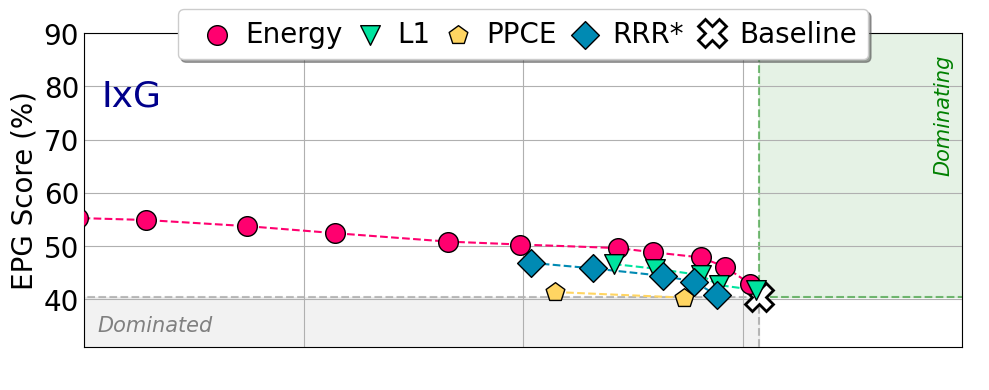

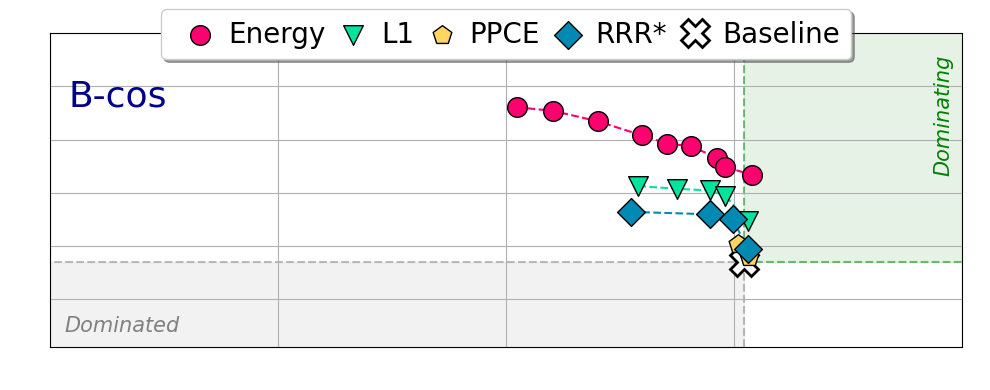

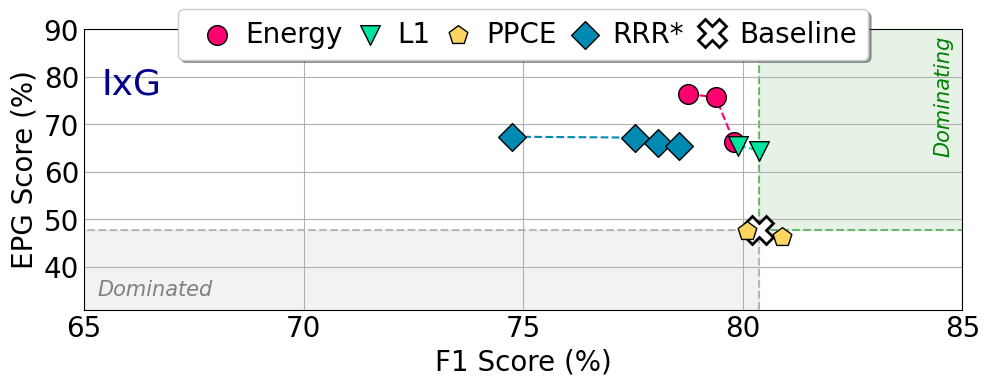

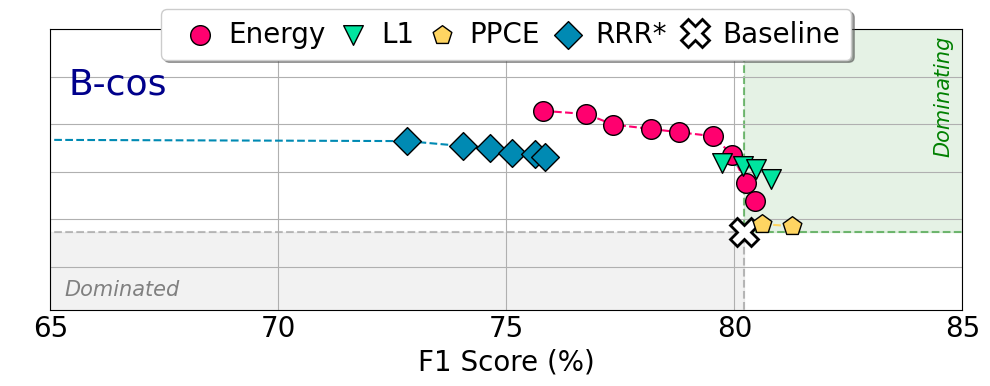

In [48]:
root_folder = './p_curves/VOC2007'
data_f1_epg = load_data_from_folders_with_npz_files(root_folder, metrics=('f_score', 'bb_score'))

x_lim_range = (65, 85)
y_lim_range = (31, 90)
step_size_xticks = 5
step_size_yticks = 10

plot_pareto_curve(
    baseline_data=data_f1_epg['vanilla']['input']['baseline'],
    energy_data=data_f1_epg['vanilla']['input']['energy'],
    l1_data=data_f1_epg['vanilla']['input']['l1'],
    ppce_data=data_f1_epg['vanilla']['input']['ppce'],
    rrr_data=data_f1_epg['vanilla']['input']['rrr'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='',
    save_path='./images/fig_5_voc2007_vanilla_resnet50_input_layer_f1_epg_pareto_curve.png',
    figsize=(10, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_x_ticks=True,
    hide_y_ticks=False,
    fontsize=20,
    attribution_method="IxG")

plot_pareto_curve(
    baseline_data=data_f1_epg['bcos']['input']['baseline'],
    energy_data=data_f1_epg['bcos']['input']['energy'],
    l1_data=data_f1_epg['bcos']['input']['l1'],
    ppce_data=data_f1_epg['bcos']['input']['ppce'],
    rrr_data=data_f1_epg['bcos']['input']['rrr'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='',
    save_path='./images/fig_5_voc2007_bcos_resnet50_input_layer_f1_epg_pareto_curve.png',
    figsize=(10, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_x_ticks=True,
    hide_y_ticks=True,
    fontsize=20,
    attribution_method="B-cos")

plot_pareto_curve(
    baseline_data=data_f1_epg['vanilla']['final']['baseline'],
    energy_data=data_f1_epg['vanilla']['final']['energy'],
    l1_data=data_f1_epg['vanilla']['final']['l1'],
    ppce_data=data_f1_epg['vanilla']['final']['ppce'],
    rrr_data=data_f1_epg['vanilla']['final']['rrr'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='',
    save_path='./images/fig_5_voc2007_vanilla_resnet50_final_layer_f1_epg_pareto_curve.png',
    figsize=(10, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_x_ticks=False,
    hide_y_ticks=False,
    fontsize=20,
    attribution_method="IxG")

plot_pareto_curve(
    baseline_data=data_f1_epg['bcos']['final']['baseline'],
    energy_data=data_f1_epg['bcos']['final']['energy'],
    l1_data=data_f1_epg['bcos']['final']['l1'],
    ppce_data=data_f1_epg['bcos']['final']['ppce'],
    rrr_data=data_f1_epg['bcos']['final']['rrr'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='',
    save_path='./images/fig_5_voc2007_bcos_resnet50_final_layer_f1_epg_pareto_curve.png',
    figsize=(10, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=(step_size_yticks),
    hide_x_ticks=False,
    hide_y_ticks=True,
    fontsize=20,
    attribution_method="B-cos")

# Metric: F1 vs. IoU

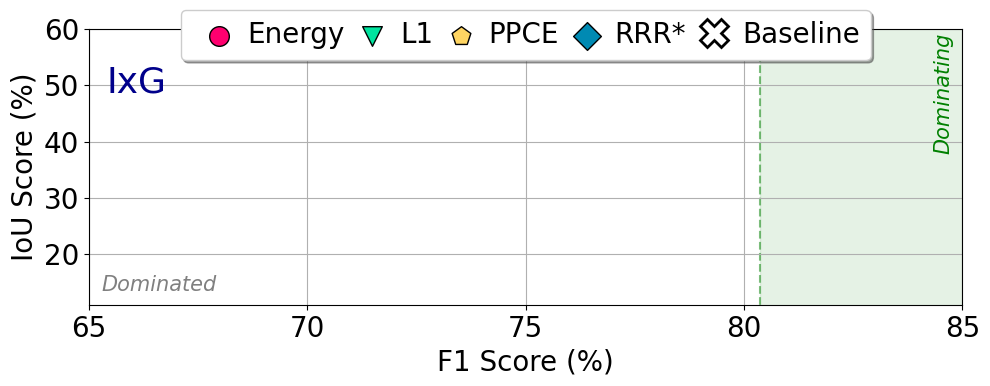

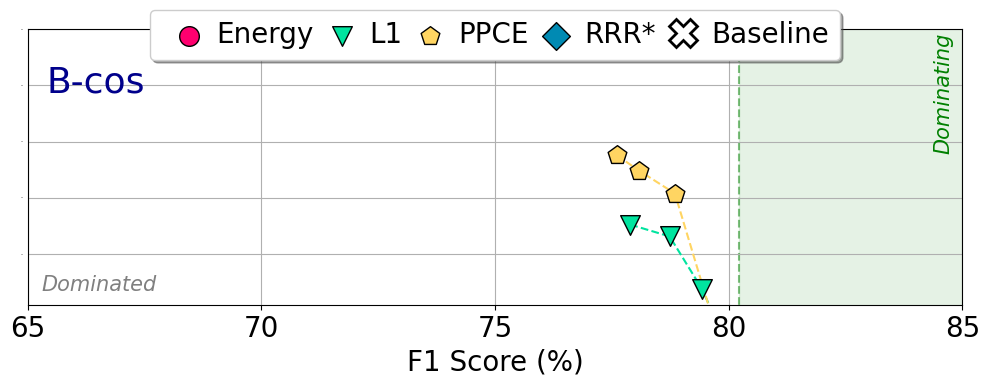

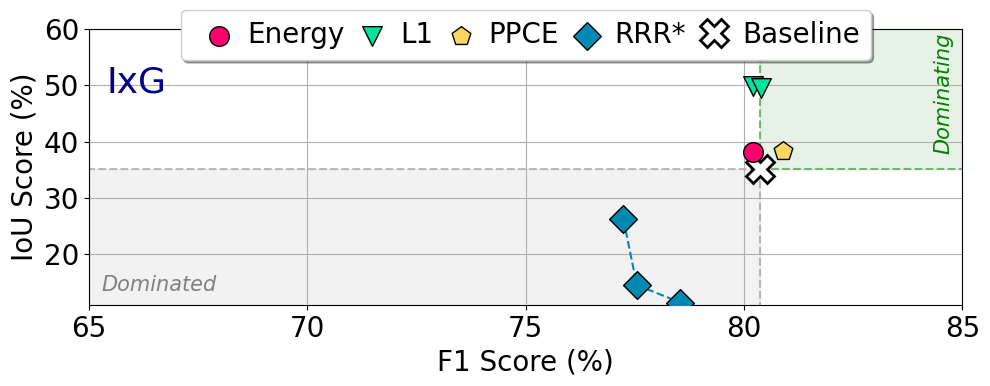

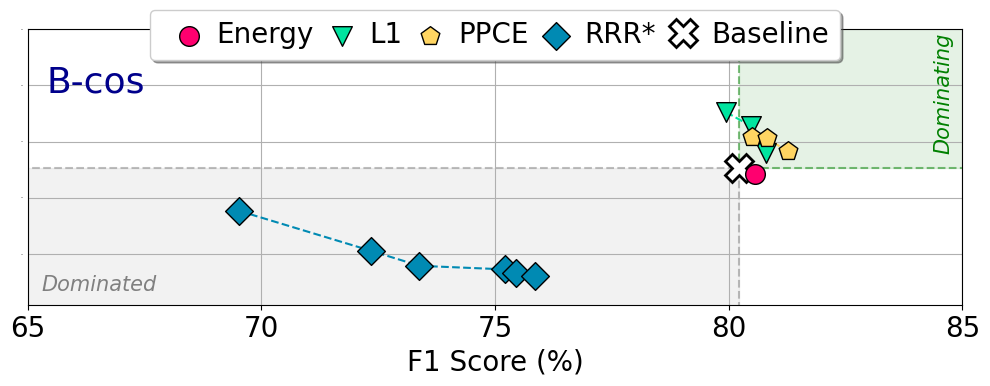

In [6]:
root_folder = './p_curves/VOC2007'
data_f1_iou = load_data_from_folders_with_npz_files(root_folder, metrics=('f_score', 'iou_score'))

x_lim_range = (65, 85)
y_lim_range = (11, 60)
step_size_xticks = 5
step_size_yticks = 10

plot_pareto_curve(
    baseline_data=data_f1_iou['vanilla']['input']['baseline'],
    energy_data=data_f1_iou['vanilla']['input']['energy'],
    l1_data=data_f1_iou['vanilla']['input']['l1'],
    ppce_data=data_f1_iou['vanilla']['input']['ppce'],
    rrr_data=data_f1_iou['vanilla']['input']['rrr'],
    x_label='F1 Score (%)',
    y_label='IoU Score (%)',
    title='',
    save_path='./images/fig_6_voc2007_vanilla_resnet50_input_layer_f1_iou_pareto_curve.png',
    figsize=(10, 4),
    set_xlim = x_lim_range,
    set_ylim = y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_y_ticks=False,
    fontsize=20,
    attribution_method="IxG")

plot_pareto_curve(
    baseline_data=data_f1_iou['bcos']['input']['baseline'],
    energy_data=data_f1_iou['bcos']['input']['energy'],
    l1_data=data_f1_iou['bcos']['input']['l1'],
    ppce_data=data_f1_iou['bcos']['input']['ppce'],
    rrr_data=data_f1_iou['bcos']['input']['rrr'],
    x_label='F1 Score (%)',
    y_label='IoU Score (%)',
    title='',
    save_path='./images/fig_6_voc2007_bcos_resnet50_input_layer_f1_iou_pareto_curve.png',
    figsize=(10, 4),
    set_xlim = x_lim_range,
    set_ylim = y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_y_ticks=True,
    fontsize=20,
    attribution_method="B-cos")

plot_pareto_curve(
    baseline_data=data_f1_iou['vanilla']['final']['baseline'],
    energy_data=data_f1_iou['vanilla']['final']['energy'],
    l1_data=data_f1_iou['vanilla']['final']['l1'],
    ppce_data=data_f1_iou['vanilla']['final']['ppce'],
    rrr_data=data_f1_iou['vanilla']['final']['rrr'],
    x_label='F1 Score (%)',
    y_label='IoU Score (%)',
    title='',
    save_path='./images/fig_6_voc2007_vanilla_resnet50_final_layer_f1_iou_pareto_curve.png',
    figsize=(10, 4),
    set_xlim = x_lim_range,
    set_ylim = y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_y_ticks=False,
    fontsize=20,
    attribution_method="IxG")

plot_pareto_curve(
    baseline_data=data_f1_iou['bcos']['final']['baseline'],
    energy_data=data_f1_iou['bcos']['final']['energy'],
    l1_data=data_f1_iou['bcos']['final']['l1'],
    ppce_data=data_f1_iou['bcos']['final']['ppce'],
    rrr_data=data_f1_iou['bcos']['final']['rrr'],
    x_label='F1 Score (%)',
    y_label='IoU Score (%)',
    save_path='./images/fig_6_voc2007_bcos_resnet50_final_layer_f1_iou_pareto_curve.png',
    figsize=(10, 4),
    set_xlim = x_lim_range,
    set_ylim = y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_y_ticks=True,
    fontsize=20,
    attribution_method="B-cos")

# Metric: F1 vs. Adapted IoU

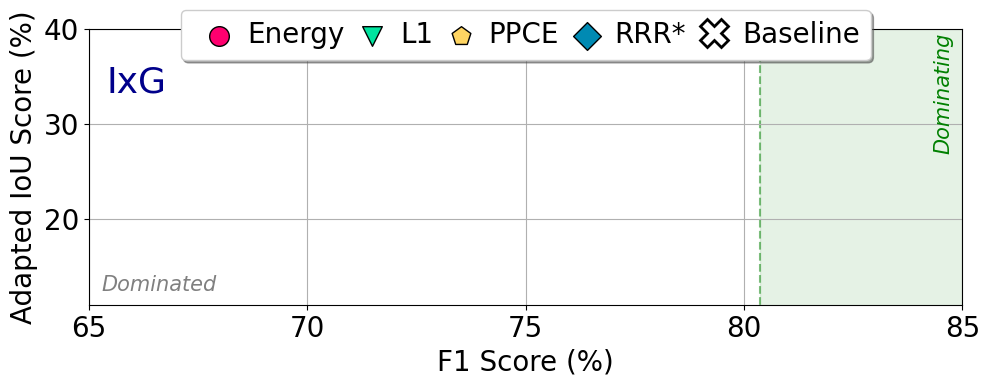

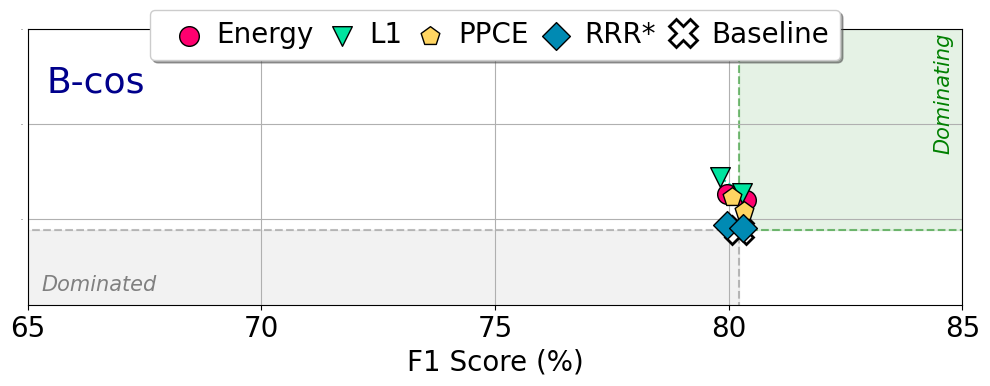

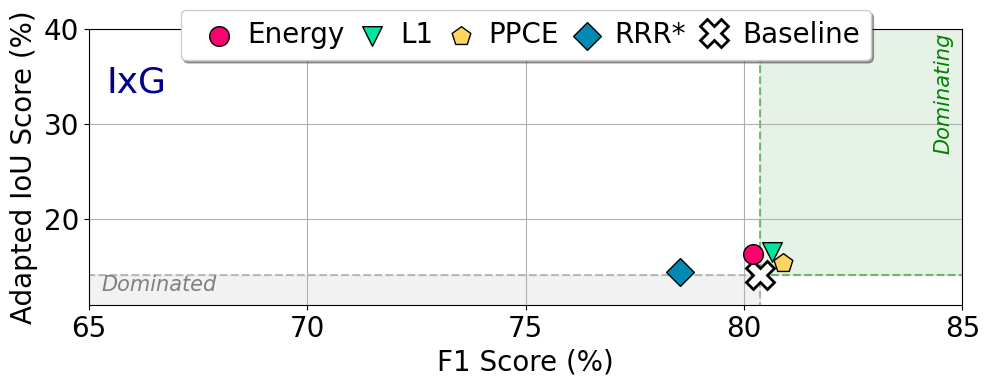

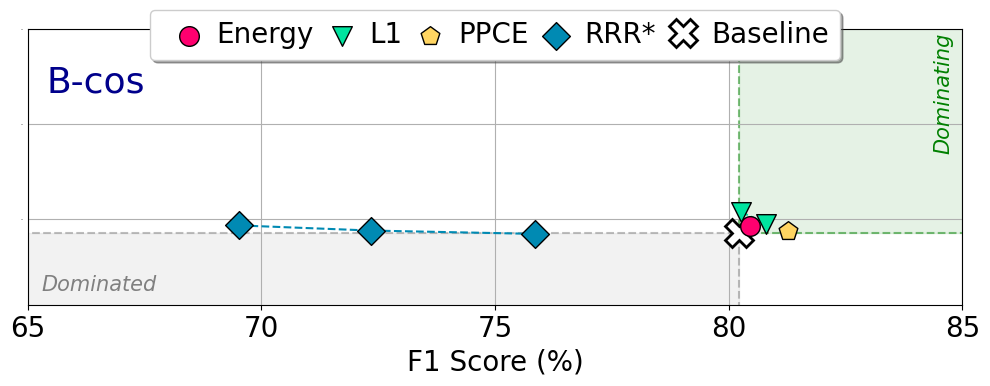

In [7]:
root_folder = './p_curves/VOC2007'
data_f1_adapt_iou = load_data_from_folders_with_npz_files(root_folder, metrics=('f_score', 'adapt_iou_score'))

x_lim_range = (65, 85)
y_lim_range = (11, 40)
step_size_xticks = 5
step_size_yticks = 10

plot_pareto_curve(
    baseline_data=data_f1_adapt_iou['vanilla']['input']['baseline'],
    energy_data=data_f1_adapt_iou['vanilla']['input']['energy'],
    l1_data=data_f1_adapt_iou['vanilla']['input']['l1'],
    ppce_data=data_f1_adapt_iou['vanilla']['input']['ppce'],
    rrr_data=data_f1_adapt_iou['vanilla']['input']['rrr'],
    x_label='F1 Score (%)',
    y_label='Adapted IoU Score (%)',
    save_path='./images/fig_6_voc2007_vanilla_resnet50_input_layer_f1_adapt_iou_pareto_curve.png',
    figsize=(10, 4),
    set_xlim = x_lim_range,
    set_ylim = y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_y_ticks=False,
    fontsize=20,
    attribution_method="IxG")

plot_pareto_curve(
    baseline_data=data_f1_adapt_iou['bcos']['input']['baseline'],
    energy_data=data_f1_adapt_iou['bcos']['input']['energy'],
    l1_data=data_f1_adapt_iou['bcos']['input']['l1'],
    ppce_data=data_f1_adapt_iou['bcos']['input']['ppce'],
    rrr_data=data_f1_adapt_iou['bcos']['input']['rrr'],
    x_label='F1 Score (%)',
    y_label='Adapted IoU Score (%)',
    save_path='./images/fig_6_voc2007_bcos_resnet50_input_layer_f1_adapt_iou_pareto_curve.png',
    figsize=(10, 4),
    set_xlim = x_lim_range,
    set_ylim = y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_y_ticks=True,
    fontsize=20,
    attribution_method="B-cos")

plot_pareto_curve(
    baseline_data=data_f1_adapt_iou['vanilla']['final']['baseline'],
    energy_data=data_f1_adapt_iou['vanilla']['final']['energy'],
    l1_data=data_f1_adapt_iou['vanilla']['final']['l1'],
    ppce_data=data_f1_adapt_iou['vanilla']['final']['ppce'],
    rrr_data=data_f1_adapt_iou['vanilla']['final']['rrr'],
    x_label='F1 Score (%)',
    y_label='Adapted IoU Score (%)',
    save_path='./images/fig_6_voc2007_vanilla_resnet50_final_layer_f1_adapt_iou_pareto_curve.png',
    figsize=(10, 4),
    set_xlim = x_lim_range,
    set_ylim = y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_y_ticks=False,
    fontsize=20,
    attribution_method="IxG")

plot_pareto_curve(
    baseline_data=data_f1_adapt_iou['bcos']['final']['baseline'],
    energy_data=data_f1_adapt_iou['bcos']['final']['energy'],
    l1_data=data_f1_adapt_iou['bcos']['final']['l1'],
    ppce_data=data_f1_adapt_iou['bcos']['final']['ppce'],
    rrr_data=data_f1_adapt_iou['bcos']['final']['rrr'],
    x_label='F1 Score (%)',
    y_label='Adapted IoU Score (%)',
    save_path='./images/fig_6_voc2007_bcos_resnet50_final_layer_f1_adapt_iou_pareto_curve.png',
    figsize=(10, 4),
    set_xlim = x_lim_range,
    set_ylim = y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_y_ticks=True,
    fontsize=20,
    attribution_method="B-cos")

# Speed-up Figures

In [8]:
def plot_pareto_curve_speed_up(
        baseline_data,
        energy_data_input_layer, 
        energy_data,
        speed_up_text,
        x_label: str = 'F1 Score (%)', 
        y_label: str = 'EPG Score (%)', 
        title: str = '', 
        save_path: Optional[str] = None, 
        figsize: Tuple[int, int] = (10, 6),
        set_xlim: Optional[Tuple[float, float]] = None,
        set_ylim: Optional[Tuple[float, float]] = None,
        step_size_xticks: Optional[int] = None,
        step_size_yticks: Optional[int] = None,
        hide_x_ticks: bool = False,
        hide_y_ticks: bool = False,
        fontsize: int = 20,
        attribution_method: str = "IxG"
    ) -> None:
    """
    Plots a Pareto curve with given data points.

    Args:
        baseline_data (Tuple[float, float]): A tuple containing x and y coordinates for the baseline point.
        energy_data (List[Tuple[float, float]]): A list of tuples containing x and y coordinates for the energy data points.
        l1_data (List[Tuple[float, float]]): A list of tuples containing x and y coordinates for the L1 data points.
        ppce_data (List[Tuple[float, float]]): A list of tuples containing x and y coordinates for the PPCE data points.
        rrr_data (List[Tuple[float, float]]): A list of tuples containing x and y coordinates for the RRR* data points.
        x_label (str, optional): Label for the x-axis. Defaults to 'F1 Score (%)'.
        y_label (str, optional): Label for the y-axis. Defaults to 'EPG Score (%)'.
        title (str, optional): Title of the plot. Defaults to 'Pareto Curve'.
        save_path (Optional[str], optional): Path to save the plot image. If None, the plot is displayed. Defaults to None.
        figsize (Tuple[int, int], optional): Figure size. Defaults to (10, 6).

    Returns:
        None
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    # Energy Input Layer
    if energy_data_input_layer:
        energy_x, energy_y = zip(*energy_data_input_layer)
        ax.plot(energy_x, energy_y, color='black', linestyle='--', label='@Input', zorder=2)

    # Energy
    if energy_data:
        energy_x, energy_y = zip(*energy_data)
        ax.scatter(energy_x, energy_y, marker='o', color='#FF006F', label='Energy', s=fontsize*10, edgecolors='black', zorder=3)
        ax.plot(energy_x, energy_y, color='#FF006F', linestyle='--', zorder=2)

    # Plot Baseline
    ax.plot(baseline_data[0], baseline_data[1], marker='X', color='white', markersize=fontsize, markeredgewidth=2, markeredgecolor='black', label='Baseline', zorder=2)

    # Find the best limits for the plot
    x_values = [x for data in [energy_data] for x, y in data] + [baseline_data[0]]
    y_values = [y for data in [energy_data] for x, y in data] + [baseline_data[1]]
    x_min, x_max = min(x_values), max(x_values)
    y_min, y_max = min(y_values), max(y_values)

    # Set the limits with some padding
    x_pad = (x_max - x_min) * 0.15
    y_pad = (y_max - y_min) * 0.15

    if set_xlim:
        ax.set_xlim(set_xlim[0], set_xlim[1])

    else:
        ax.set_xlim(x_min - x_pad, x_max + x_pad)

    if set_ylim:
        ax.set_ylim(set_ylim[0], set_ylim[1])

    else:
        ax.set_ylim(y_min - y_pad, y_max + y_pad)

    # Dominated region (gray)
    ax.plot([0, baseline_data[0]], [baseline_data[1], baseline_data[1]], '--', color='gray', alpha=0.5, zorder=1)
    ax.plot([baseline_data[0], baseline_data[0]], [-20, baseline_data[1]], '--', color='gray', alpha=0.5, zorder=1)
    ax.fill_between([baseline_data[0], -20], [baseline_data[1], baseline_data[1]], [-20, -20], color='gray', alpha=0.1, zorder=1)
    
    # Dominating region (green)
    ax.plot([baseline_data[0], 120], [baseline_data[1], baseline_data[1]], '--', color='green', alpha=0.5, zorder=1)
    ax.plot([baseline_data[0], baseline_data[0]], [120, baseline_data[1]], '--', color='green', alpha=0.5, zorder=1)
    ax.fill_between([120, baseline_data[0]], [baseline_data[1], baseline_data[1]], [120, 120], color='green', alpha=0.1, zorder=1)

    # # Place text using axes fraction
    # ax.text(0.015, 0.04, 'Dominated', transform=ax.transAxes, fontsize=10, color='gray', alpha=1, fontstyle='italic')
    # ax.text(0.98, 0.8, 'Dominating', transform=ax.transAxes, fontsize=10, color='green', alpha=1, fontstyle='italic', rotation=90, ha='right')

    # Place text using axes fraction
    ax.text(0.015, 0.05, 'Dominated', transform=ax.transAxes, fontsize=15, color='gray', alpha=1, fontstyle='italic')
    # ax.text(0.02, 0.77, attribution_method, transform=ax.transAxes, fontsize=fontsize + 6, color='darkblue', alpha=1)
    ax.text(0.99, 0.56, 'Dominating', transform=ax.transAxes, fontsize=15, color='green', alpha=1, fontstyle='italic', rotation=90, ha='right')

    # Place speed-up
    ax.text(0.02, 0.175, speed_up_text, transform=ax.transAxes, fontsize=24, color='black', alpha=1, fontstyle='italic')

    # Legend, Axes, and Labels
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=5, fancybox=True, shadow=True, fontsize=fontsize, columnspacing=0, handletextpad=0.0)
    ax.set_xlabel(x_label, fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)

    if not hide_x_ticks:
        ax.set_xlabel(x_label, fontsize=fontsize)
        ax.tick_params(axis='x', labelsize=fontsize, length=0)
    else:
        # Hide x-axis tick labels
        ax.set_xlabel('')
        # Make the x-axis ticks white
        ax.tick_params(axis='x', labelsize=fontsize, colors='white', length=0)

    if not hide_y_ticks:
        ax.set_ylabel(y_label, fontsize=fontsize)
        ax.tick_params(axis='y', labelsize=fontsize, length=0)
    else:
        # Hide y-axis tick labels
        ax.set_ylabel('')
        ax.tick_params(axis='y', labelsize=fontsize, colors='white', length=0)

    if step_size_xticks:
        ax.xaxis.set_major_locator(plt.MultipleLocator(step_size_xticks))
    else:
        ax.xaxis.set_major_locator(plt.MultipleLocator(5))


    if step_size_yticks:
        ax.yaxis.set_major_locator(plt.MultipleLocator(step_size_yticks))
    else:
        ax.yaxis.set_major_locator(plt.MultipleLocator(5))

            
    ax.set_title(title, fontsize=16, fontstyle='italic')
    ax.grid(True)

    # Adjust layout for consistent PNG height
    plt.tight_layout()

    # Save or show plot depending on save_path
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, bbox_inches='tight')

    plt.show()

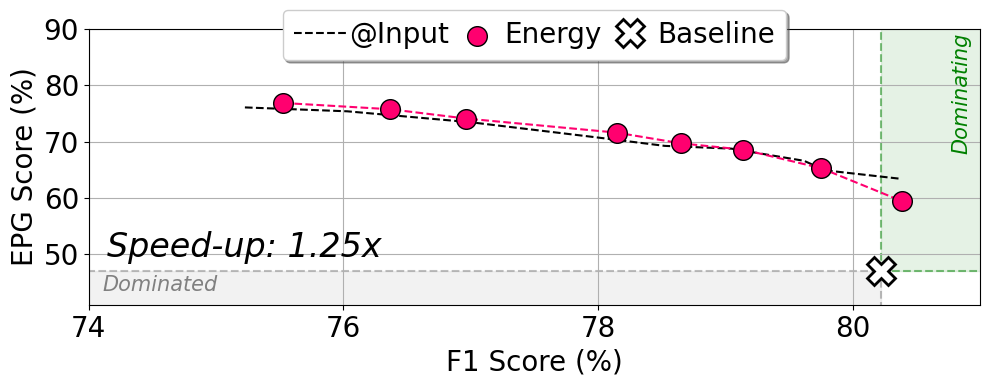

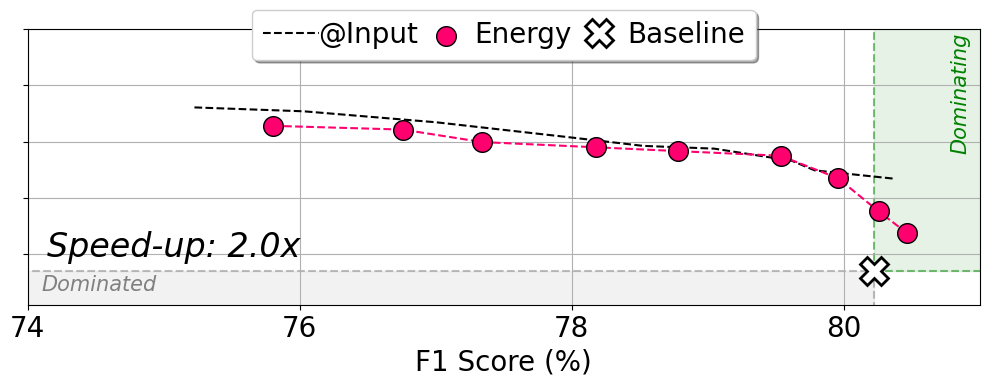

In [9]:
root_folder = './p_curves/VOC2007'
data_speed_up_f1_epg = load_data_from_folders_with_npz_files(root_folder, metrics=('f_score', 'bb_score'))

x_lim_range = (74, 81)
y_lim_range = (41, 90)
step_size_xticks = 2
step_size_yticks = 10

plot_pareto_curve_speed_up(
    baseline_data=data_speed_up_f1_epg['bcos']['input']['baseline'],
    energy_data_input_layer=data_speed_up_f1_epg['bcos']['input']['energy'],
    energy_data=data_speed_up_f1_epg['bcos']['mid2']['energy'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    speed_up_text='Speed-up: 1.25x',
    save_path='./images/fig_8_voc2007_bcos_resnet50_speed_up_f1_epg_input_layer_mid2_layer.png',
    figsize=(10, 4),
    set_xlim = x_lim_range,
    set_ylim = y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_y_ticks=False,
    fontsize=20,
    attribution_method="")

plot_pareto_curve_speed_up(
    baseline_data=data_speed_up_f1_epg['bcos']['input']['baseline'],
    energy_data_input_layer=data_speed_up_f1_epg['bcos']['input']['energy'],
    energy_data=data_speed_up_f1_epg['bcos']['final']['energy'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    speed_up_text='Speed-up: 2.0x',
    save_path='./images/fig_8_voc2007_bcos_resnet50_speed_up_f1_epg_input_layer_final_layer.png',
    figsize=(10, 4),
    set_xlim = x_lim_range,
    set_ylim = y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_y_ticks=True,
    fontsize=20,
    attribution_method="")

# Plots for EPG results with limited annotations

In [10]:
def load_data_from_folders_with_npz_files_with_limited_ann(
    root_folder: str, 
    metrics: Tuple[str, str] = ('f_score', 'bb_score')
) -> Dict[str, Dict[str, Dict[str, List[Tuple[float, float]]]]]:
    """
    Loads and organizes data from specified folders with lim0.01, lim0.1, and lim1.0 instead of input, final, and mid2.

    Args:
        root_folder (str): Root directory containing the data folders.
        metrics (Tuple[str, str], optional): A tuple specifying the metrics to be used. Defaults to ('f_score', 'bb_score').

    Returns:
        Dict[str, Dict[str, Dict[str, List[Tuple[float, float]]]]]: A dictionary containing organized data.
    """
    valid_metrics = ['f_score', 'bb_score', 'iou_score', 'adapt_iou_score']
    data_types = ['energy', 'l1', 'baseline']
    data_structure = {data_type: [] for data_type in data_types}

    data_dict = {'vanilla': {'lim0.01': dict(data_structure), 'lim0.1': dict(data_structure), 'lim1.0': dict(data_structure)}, 
                 'bcos': {'lim0.01': dict(data_structure), 'lim0.1': dict(data_structure), 'lim1.0': dict(data_structure)}}
    
    if not all(metric in valid_metrics for metric in metrics):
        raise ValueError(f'Invalid metrics: {metrics}. Valid options are {valid_metrics}')
    
    for subdir, _, files in os.walk(root_folder):
        for file in files:
            if file.endswith('.npz'):

                category = 'vanilla' if 'vanilla' in subdir.lower() else 'bcos' if 'bcos' in subdir.lower() else None
                if category is None:
                    continue

                filepath = os.path.join(subdir, file)
                data = np.load(filepath)

                data = {metric: data[metric] * 100 for metric in metrics}

                if 'baseline' in subdir.lower() and 'input' in file.lower():

                    data_dict[category]['lim0.01']['baseline'] = (data[metrics[0]], data[metrics[1]])

                if 'baseline' in subdir.lower() and 'input' in file.lower():

                    data_dict[category]['lim0.1']['baseline'] = (data[metrics[0]], data[metrics[1]])

                if 'baseline' in subdir.lower() and 'input' in file.lower():
                        
                    data_dict[category]['lim1.0']['baseline'] = (data[metrics[0]], data[metrics[1]])

                if 'bb_score' in metrics and file.split('_')[0] == 'EPG':

                    if 'lim0.01' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['lim0.01']['energy'].append((data[metrics[0]], data[metrics[1]]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['lim0.01']['l1'].append((data[metrics[0]], data[metrics[1]]))

                    if 'lim0.1' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['lim0.1']['energy'].append((data[metrics[0]], data[metrics[1]]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['lim0.1']['l1'].append((data[metrics[0]], data[metrics[1]]))

                    if 'lim1.0' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['lim1.0']['energy'].append((data[metrics[0]], data[metrics[1]]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['lim1.0']['l1'].append((data[metrics[0]], data[metrics[1]]))


        # Sorting data for each category
        for category in ['vanilla', 'bcos']:
            for data_type in data_types:
                if data_type != 'baseline':
                    data_dict[category]['lim0.01'][data_type] = sorted(data_dict[category]['lim0.01'][data_type])
                    data_dict[category]['lim0.1'][data_type] = sorted(data_dict[category]['lim0.1'][data_type])
                    data_dict[category]['lim1.0'][data_type] = sorted(data_dict[category]['lim1.0'][data_type])
                    
    return data_dict

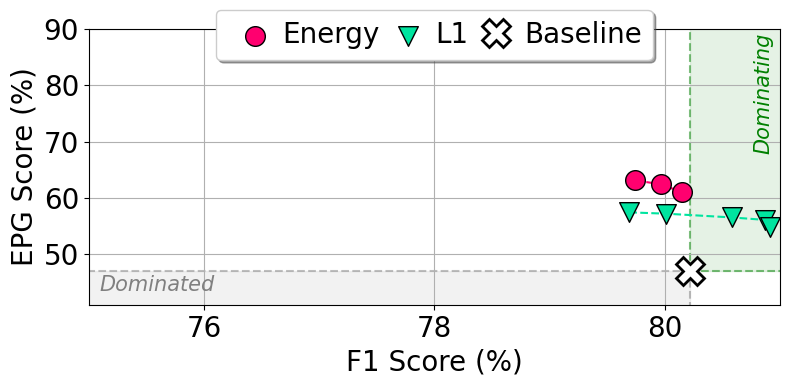

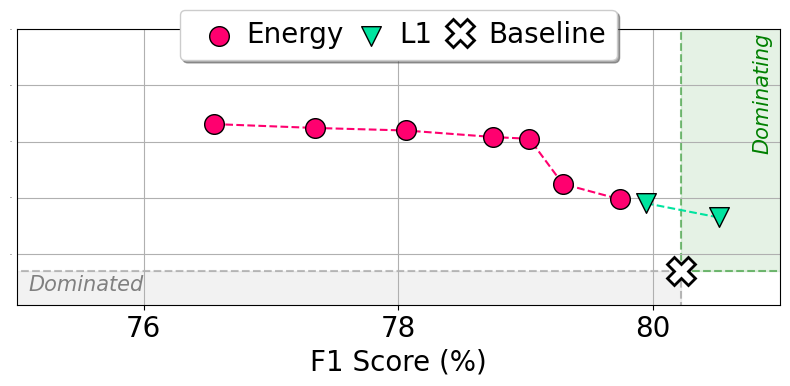

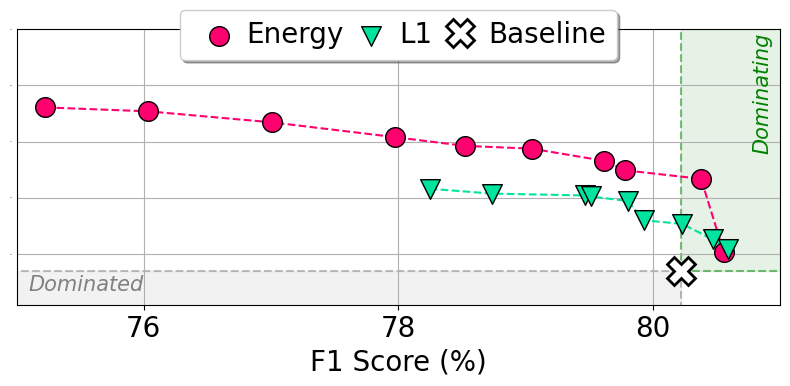

In [11]:
root_folder = './p_c_ann'
data_limited_ann_f1_epg = load_data_from_folders_with_npz_files_with_limited_ann(root_folder, metrics=('f_score', 'bb_score'))

x_lim_range = (75, 81)
y_lim_range = (41, 90)
step_size_xticks = 2
step_size_yticks = 10

plot_pareto_curve(
    baseline_data=data_limited_ann_f1_epg['bcos']['lim0.01']['baseline'],
    energy_data=data_limited_ann_f1_epg['bcos']['lim0.01']['energy'],
    l1_data=data_limited_ann_f1_epg['bcos']['lim0.01']['l1'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    save_path='./images/fig_12_voc2007_bcos_resnet50_limited_ann_0.01_f1_epg_pareto_curve.png',
    figsize=(8, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_y_ticks=False,
    fontsize=20,
    attribution_method="")

plot_pareto_curve(
    baseline_data=data_limited_ann_f1_epg['bcos']['lim0.1']['baseline'],
    energy_data=data_limited_ann_f1_epg['bcos']['lim0.1']['energy'],
    l1_data=data_limited_ann_f1_epg['bcos']['lim0.1']['l1'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    save_path='./images/fig_12_voc2007_bcos_resnet50_limited_ann_0.1_f1_epg_pareto_curve.png',
    figsize=(8, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_y_ticks=True,
    fontsize=20,
    attribution_method="")

plot_pareto_curve(
    baseline_data=data_limited_ann_f1_epg['bcos']['lim1.0']['baseline'],
    energy_data=data_limited_ann_f1_epg['bcos']['lim1.0']['energy'],
    l1_data=data_limited_ann_f1_epg['bcos']['lim1.0']['l1'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    save_path='./images/fig_12_voc2007_bcos_resnet50_limited_ann_1.0_f1_epg_pareto_curve.png',
    figsize=(8, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_y_ticks=True,
    fontsize=20,
    attribution_method="")

In [12]:
def load_data_from_folders_with_npz_files_with_dilation(
    root_folder: str, 
    metrics: Tuple[str, str] = ('f_score', 'bb_score')
) -> Dict[str, Dict[str, Dict[str, List[Tuple[float, float]]]]]:
    """
    Loads and organizes data from specified folders with lim0.01, lim0.1, and lim1.0 instead of input, final, and mid2.

    Args:
        root_folder (str): Root directory containing the data folders.
        metrics (Tuple[str, str], optional): A tuple specifying the metrics to be used. Defaults to ('f_score', 'bb_score').

    Returns:
        Dict[str, Dict[str, Dict[str, List[Tuple[float, float]]]]]: A dictionary containing organized data.
    """
    valid_metrics = ['f_score', 'bb_score', 'iou_score', 'adapt_iou_score']
    data_types = ['energy', 'l1', 'baseline']
    data_structure = {data_type: [] for data_type in data_types}

    data_dict = {'vanilla': {'dil0': dict(data_structure), 'dil0.1': dict(data_structure), 'dil0.25': dict(data_structure), 'dil0.5': dict(data_structure),
                             'dil0_not_pareto': dict(data_structure), 'dil0.1_not_pareto': dict(data_structure), 'dil0.25_not_pareto': dict(data_structure), 'dil0.5_not_pareto': dict(data_structure)},
                    'bcos': {'dil0': dict(data_structure), 'dil0.1': dict(data_structure), 'dil0.25': dict(data_structure), 'dil0.5': dict(data_structure),
                             'dil0_not_pareto': dict(data_structure), 'dil0.1_not_pareto': dict(data_structure), 'dil0.25_not_pareto': dict(data_structure), 'dil0.5_not_pareto': dict(data_structure)}}
    
    if not all(metric in valid_metrics for metric in metrics):
        raise ValueError(f'Invalid metrics: {metrics}. Valid options are {valid_metrics}')
    
    for subdir, _, files in os.walk(root_folder):
        for file in files:
            if file.endswith('.npz'):


                category = 'vanilla' if 'vanilla' in subdir.lower() else 'bcos' if 'bcos' in subdir.lower() else None
                if category is None:
                    continue

                filepath = os.path.join(subdir, file)
                data = np.load(filepath)

                data = {metric: data[metric] * 100 for metric in metrics}

                if 'baseline' in subdir.lower() and 'input' in file.lower():

                    data_dict[category]['dil0']['baseline'] = (data[metrics[0]], data[metrics[1]])

                if 'baseline' in subdir.lower() and 'input' in file.lower():

                    data_dict[category]['dil0.1']['baseline'] = (data[metrics[0]], data[metrics[1]])

                if 'baseline' in subdir.lower() and 'input' in file.lower():

                    data_dict[category]['dil0.25']['baseline'] = (data[metrics[0]], data[metrics[1]])

                if 'baseline' in subdir.lower() and 'input' in file.lower():

                    data_dict[category]['dil0.5']['baseline'] = (data[metrics[0]], data[metrics[1]])

                if ('bb_score' in metrics and file.split('_')[0] == 'EPG') or ('adapt_iou_score' in metrics and file.split('_')[0] == 'ADAPT'):\

                    if 'dil0/yes_par' in subdir.lower():
                    
                        if 'energy' in subdir.lower():
                            data_dict[category]['dil0']['energy'].append((data[metrics[0]], data[metrics[1]]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['dil0']['l1'].append((data[metrics[0]], data[metrics[1]]))

                    if 'dil0.1/yes_par' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['dil0.1']['energy'].append((data[metrics[0]], data[metrics[1]]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['dil0.1']['l1'].append((data[metrics[0]], data[metrics[1]]))

                    if 'dil0.25/yes_par' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['dil0.25']['energy'].append((data[metrics[0]], data[metrics[1]]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['dil0.25']['l1'].append((data[metrics[0]], data[metrics[1]]))

                    if 'dil0.5/yes_par' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['dil0.5']['energy'].append((data[metrics[0]], data[metrics[1]]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['dil0.5']['l1'].append((data[metrics[0]], data[metrics[1]]))

                    if 'dil0/not_par' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['dil0_not_pareto']['energy'].append((data[metrics[0]], data[metrics[1]]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['dil0_not_pareto']['l1'].append((data[metrics[0]], data[metrics[1]]))

                    if 'dil0.1/not_par' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['dil0.1_not_pareto']['energy'].append((data[metrics[0]], data[metrics[1]]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['dil0.1_not_pareto']['l1'].append((data[metrics[0]], data[metrics[1]]))

                    if 'dil0.25/not_par' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['dil0.25_not_pareto']['energy'].append((data[metrics[0]], data[metrics[1]]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['dil0.25_not_pareto']['l1'].append((data[metrics[0]], data[metrics[1]]))

                    if 'dil0.5/not_par' in subdir.lower():
                        if 'energy' in subdir.lower():
                            data_dict[category]['dil0.5_not_pareto']['energy'].append((data[metrics[0]], data[metrics[1]]))
                        elif 'l1' in subdir.lower():
                            data_dict[category]['dil0.5_not_pareto']['l1'].append((data[metrics[0]], data[metrics[1]]))


        # Sorting data for each category
        for category in ['vanilla', 'bcos']:
            for data_type in data_types:
                if data_type != 'baseline':
                    data_dict[category]['dil0'][data_type] = sorted(data_dict[category]['dil0'][data_type])
                    data_dict[category]['dil0.1'][data_type] = sorted(data_dict[category]['dil0.1'][data_type])
                    data_dict[category]['dil0.25'][data_type] = sorted(data_dict[category]['dil0.25'][data_type])
                    data_dict[category]['dil0.5'][data_type] = sorted(data_dict[category]['dil0.5'][data_type])

                    data_dict[category]['dil0_not_pareto'][data_type] = sorted(data_dict[category]['dil0_not_pareto'][data_type])
                    data_dict[category]['dil0.1_not_pareto'][data_type] = sorted(data_dict[category]['dil0.1_not_pareto'][data_type])
                    data_dict[category]['dil0.25_not_pareto'][data_type] = sorted(data_dict[category]['dil0.25_not_pareto'][data_type])
                    data_dict[category]['dil0.5_not_pareto'][data_type] = sorted(data_dict[category]['dil0.5_not_pareto'][data_type])
                    
    return data_dict

In [13]:
def plot_pareto_curve_dilation(
    baseline_data: Tuple[float, float], 
    data_0 : List[Tuple[float, float]],
    data_01 : List[Tuple[float, float]],
    data_025 : List[Tuple[float, float]],
    data_05 : List[Tuple[float, float]],
    data_0_not_pareto : List[Tuple[float, float]],
    data_01_not_pareto : List[Tuple[float, float]],
    data_025_not_pareto : List[Tuple[float, float]],
    data_05_not_pareto : List[Tuple[float, float]],
    loss: str = 'Energy',
    x_label: str = 'F1 Score (%)', 
    y_label: str = 'EPG Score (%)', 
    title: str = '', 
    save_path: Optional[str] = None, 
    figsize: Tuple[int, int] = (10, 6),
    set_xlim: Optional[Tuple[float, float]] = None,
    set_ylim: Optional[Tuple[float, float]] = None,
    step_size_xticks: Optional[int] = None,
    step_size_yticks: Optional[int] = None,
    hide_x_ticks: bool = False,
    hide_y_ticks: bool = False,
    fontsize: int = 20,
    attribution_method: str = "IxG"
    ) -> None:
    """
    Plots a Pareto curve with given data points.

    Args:
        baseline_data (Tuple[float, float]): A tuple containing x and y coordinates for the baseline point.
        energy_data (List[Tuple[float, float]]): A list of tuples containing x and y coordinates for the energy data points.
        l1_data (List[Tuple[float, float]]): A list of tuples containing x and y coordinates for the L1 data points.
        ppce_data (List[Tuple[float, float]]): A list of tuples containing x and y coordinates for the PPCE data points.
        rrr_data (List[Tuple[float, float]]): A list of tuples containing x and y coordinates for the RRR* data points.
        x_label (str, optional): Label for the x-axis. Defaults to 'F1 Score (%)'.
        y_label (str, optional): Label for the y-axis. Defaults to 'EPG Score (%)'.
        title (str, optional): Title of the plot. Defaults to 'Pareto Curve'.
        save_path (Optional[str], optional): Path to save the plot image. If None, the plot is displayed. Defaults to None.
        figsize (Tuple[int, int], optional): Figure size. Defaults to (10, 6).

    Returns:
        None
    """
    
    fig, ax = plt.subplots(figsize=figsize)

    # Plot Baseline
    ax.plot(baseline_data[0], baseline_data[1], marker='X', color='white', markersize=fontsize, markeredgewidth=2, markeredgecolor='black', label='Baseline', zorder=2)

    # Helper function for plotting data points and lines
    def plot_data(data, marker, color, label, alpha, zorder=3):
        if data:
            x, y = zip(*data)
            ax.scatter(x, y, marker=marker, color=color, label=label, s=fontsize*10, edgecolors='black', alpha=alpha, zorder=zorder)

    # Plot each dataset
    if loss == 'Energy':
        plot_data(data_0, 'o', '#09236c', '0%', 1, zorder=3)
        plot_data(data_01, 'o', '#0082c1', '10%', 1, zorder=3)
        plot_data(data_025, 'o', '#9fd0e6', '25%', 1, zorder=3)
        plot_data(data_05, 'o', '#f6fbff', '50%', 1, zorder=3)
        plot_data(data_0_not_pareto, 'o', '#09236c', '', 0.5, zorder=2)
        plot_data(data_01_not_pareto, 'o', '#0082c1', '', 0.5, zorder=2)
        plot_data(data_025_not_pareto, 'o', '#9fd0e6', '', 0.5, zorder=2)
        plot_data(data_05_not_pareto, 'o', '#f6fbff', '', 0.5, zorder=2)

    elif loss == 'L1':
        plot_data(data_0, 'v', '#09236c', '0%', 1, zorder=3)
        plot_data(data_01, 'v', '#0082c1', '10%', 1, zorder=3)
        plot_data(data_025, 'v', '#9fd0e6', '25%', 1, zorder=3)
        plot_data(data_05, 'v', '#f6fbff', '50%', 1, zorder=3)
        plot_data(data_0_not_pareto, 'v', '#09236c', '', 0.5, zorder=2)
        plot_data(data_01_not_pareto, 'v', '#0082c1', '', 0.5, zorder=2)
        plot_data(data_025_not_pareto, 'v', '#9fd0e6', '', 0.5, zorder=2)
        plot_data(data_05_not_pareto, 'v', '#f6fbff', '', 0.5, zorder=2)

    # Find the best limits for the plot
    x_values = [x for data in [data_0] for x, y in data] + [baseline_data[0]]
    y_values = [y for data in [data_0] for x, y in data] + [baseline_data[1]]
    x_min, x_max = min(x_values), max(x_values)
    y_min, y_max = min(y_values), max(y_values)

    # Set the limits with some padding
    x_pad = (x_max - x_min) * 0.15
    y_pad = (y_max - y_min) * 0.15

    if set_xlim:
        ax.set_xlim(set_xlim[0], set_xlim[1])

    else:
        ax.set_xlim(x_min - x_pad, x_max + x_pad)

    if set_ylim:
        ax.set_ylim(set_ylim[0], set_ylim[1])

    else:
        ax.set_ylim(y_min - y_pad, y_max + y_pad)

    # Dominated region (gray)
    ax.plot([0, baseline_data[0]], [baseline_data[1], baseline_data[1]], '--', color='gray', alpha=0.5, zorder=1)
    ax.plot([baseline_data[0], baseline_data[0]], [-20, baseline_data[1]], '--', color='gray', alpha=0.5, zorder=1)
    ax.fill_between([baseline_data[0], -20], [baseline_data[1], baseline_data[1]], [-20, -20], color='gray', alpha=0.1, zorder=1)
    
    # Dominating region (green)
    ax.plot([baseline_data[0], 120], [baseline_data[1], baseline_data[1]], '--', color='green', alpha=0.5, zorder=1)
    ax.plot([baseline_data[0], baseline_data[0]], [120, baseline_data[1]], '--', color='green', alpha=0.5, zorder=1)
    ax.fill_between([120, baseline_data[0]], [baseline_data[1], baseline_data[1]], [120, 120], color='green', alpha=0.1, zorder=1)

    # # Place text using axes fraction
    # ax.text(0.015, 0.04, 'Dominated', transform=ax.transAxes, fontsize=10, color='gray', alpha=1, fontstyle='italic')
    # ax.text(0.98, 0.8, 'Dominating', transform=ax.transAxes, fontsize=10, color='green', alpha=1, fontstyle='italic', rotation=90, ha='right')

    # Place text using axes fraction
    ax.text(0.015, 0.05, 'Dominated', transform=ax.transAxes, fontsize=15, color='gray', alpha=1, fontstyle='italic')
    # ax.text(0.02, 0.77, attribution_method, transform=ax.transAxes, fontsize=fontsize + 6, color='darkblue', alpha=1)
    ax.text(0.99, 0.56, 'Dominating', transform=ax.transAxes, fontsize=15, color='green', alpha=1, fontstyle='italic', rotation=90, ha='right')

    # Legend, Axes, and Labels
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=5, fancybox=True, shadow=True, fontsize=fontsize, columnspacing=0, handletextpad=0.0)
    ax.set_xlabel(x_label, fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)

    if not hide_x_ticks:
        ax.set_xlabel(x_label, fontsize=fontsize)
        ax.tick_params(axis='x', labelsize=fontsize, length=0)
    else:
        # Hide x-axis tick labels
        ax.set_xlabel('')
        # Make the x-axis ticks white
        ax.tick_params(axis='x', labelsize=fontsize, colors='white', length=0)

    if not hide_y_ticks:
        ax.set_ylabel(y_label, fontsize=fontsize)
        ax.tick_params(axis='y', labelsize=fontsize, length=0)
    else:
        # Hide y-axis tick labels
        ax.set_ylabel('')
        ax.tick_params(axis='y', labelsize=fontsize, colors='white', length=0)

    if step_size_xticks:
        ax.xaxis.set_major_locator(plt.MultipleLocator(step_size_xticks))
    else:
        ax.xaxis.set_major_locator(plt.MultipleLocator(5))


    if step_size_yticks:
        ax.yaxis.set_major_locator(plt.MultipleLocator(step_size_yticks))
    else:
        ax.yaxis.set_major_locator(plt.MultipleLocator(5))
        
            
    ax.set_title(title, fontsize=16, fontstyle='italic')
    ax.grid(True)

    # Adjust layout for consistent PNG height
    plt.tight_layout()

    # Save or show plot depending on save_path
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, bbox_inches='tight')

    plt.show()

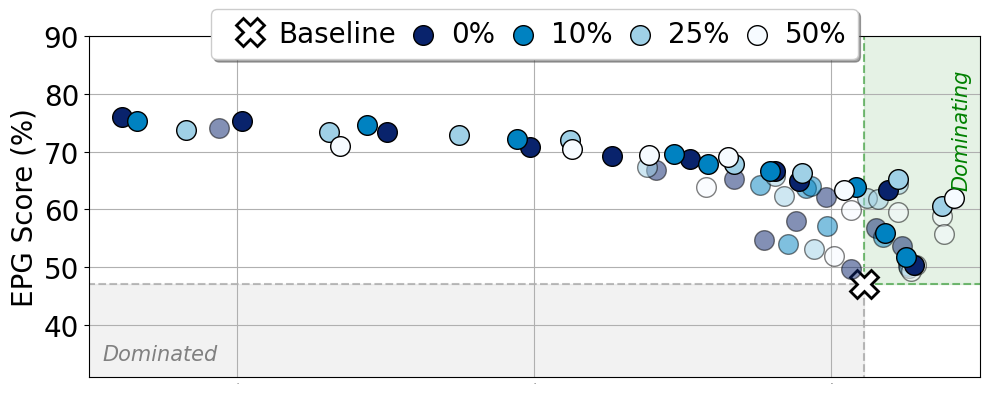

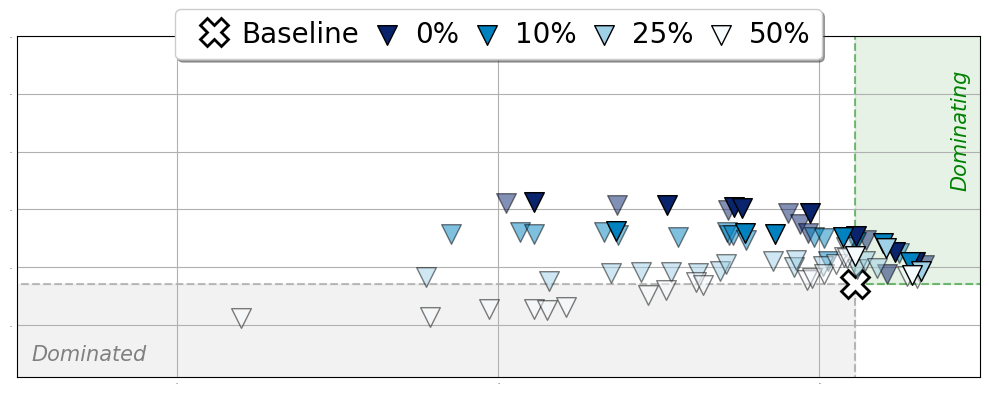

In [14]:
root_folder = './p_c_dil'
data_dilation_f1_epg = load_data_from_folders_with_npz_files_with_dilation(root_folder, metrics=('f_score', 'bb_score'))

x_lim_range = (75, 81)
y_lim_range = (31, 90)
step_size_xticks = 2
step_size_yticks = 10

plot_pareto_curve_dilation(
    baseline_data=data_dilation_f1_epg['bcos']['dil0']['baseline'],
    data_0=data_dilation_f1_epg['bcos']['dil0']['energy'],
    data_01=data_dilation_f1_epg['bcos']['dil0.1']['energy'],
    data_025=data_dilation_f1_epg['bcos']['dil0.25']['energy'],
    data_05=data_dilation_f1_epg['bcos']['dil0.5']['energy'],
    data_0_not_pareto=data_dilation_f1_epg['bcos']['dil0_not_pareto']['energy'],
    data_01_not_pareto=data_dilation_f1_epg['bcos']['dil0.1_not_pareto']['energy'],
    data_025_not_pareto=data_dilation_f1_epg['bcos']['dil0.25_not_pareto']['energy'],
    data_05_not_pareto=data_dilation_f1_epg['bcos']['dil0.5_not_pareto']['energy'],
    loss='Energy',
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    save_path='./images/fig_10_voc2007_bcos_resnet50_dilation_loss_energy_f1_epg_pareto_curve.png',
    figsize=(10, 4),
    set_xlim = x_lim_range,
    set_ylim = y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_x_ticks=True,
    hide_y_ticks=False,
    fontsize=20)

plot_pareto_curve_dilation(
    baseline_data=data_dilation_f1_epg['bcos']['dil0']['baseline'],
    data_0=data_dilation_f1_epg['bcos']['dil0']['l1'],
    data_01=data_dilation_f1_epg['bcos']['dil0.1']['l1'],
    data_025=data_dilation_f1_epg['bcos']['dil0.25']['l1'],
    data_05=data_dilation_f1_epg['bcos']['dil0.5']['l1'],
    data_0_not_pareto=data_dilation_f1_epg['bcos']['dil0_not_pareto']['l1'],
    data_01_not_pareto=data_dilation_f1_epg['bcos']['dil0.1_not_pareto']['l1'],
    data_025_not_pareto=data_dilation_f1_epg['bcos']['dil0.25_not_pareto']['l1'],
    data_05_not_pareto=data_dilation_f1_epg['bcos']['dil0.5_not_pareto']['l1'],
    loss='L1',
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    save_path='./images/fig_10_voc2007_bcos_resnet50_dilation_loss_l1_f1_epg_pareto_curve.png',
    figsize=(10, 4),
    set_xlim = x_lim_range,
    set_ylim = y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_x_ticks=True,
    hide_y_ticks=True,
    fontsize=20)

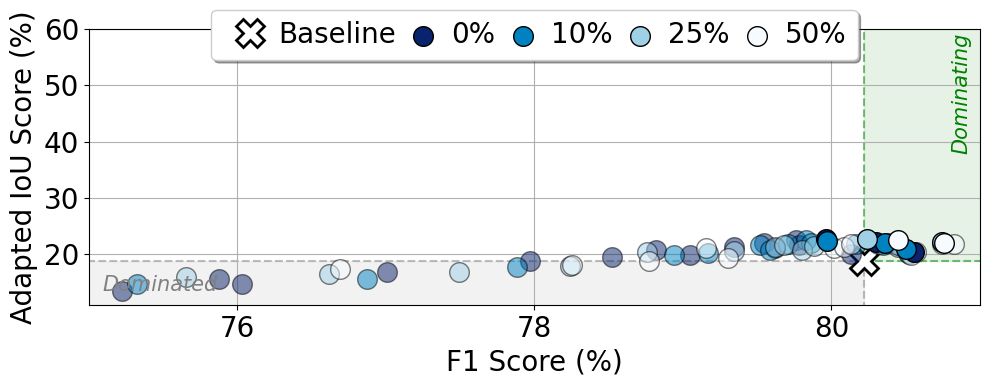

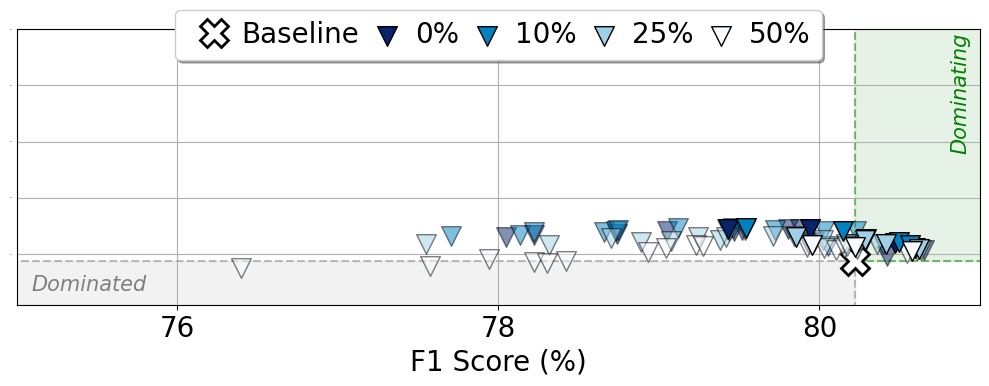

In [15]:
root_folder = './p_c_dil'
data_dilation_f1_epg = load_data_from_folders_with_npz_files_with_dilation(root_folder, metrics=('f_score', 'adapt_iou_score'))

x_lim_range = (75, 81)
y_lim_range = (11, 60)
step_size_xticks = 2
step_size_yticks = 10

plot_pareto_curve_dilation(
    baseline_data=data_dilation_f1_epg['bcos']['dil0']['baseline'],
    data_0=data_dilation_f1_epg['bcos']['dil0']['energy'],
    data_01=data_dilation_f1_epg['bcos']['dil0.1']['energy'],
    data_025=data_dilation_f1_epg['bcos']['dil0.25']['energy'],
    data_05=data_dilation_f1_epg['bcos']['dil0.5']['energy'],
    data_0_not_pareto=data_dilation_f1_epg['bcos']['dil0_not_pareto']['energy'],
    data_01_not_pareto=data_dilation_f1_epg['bcos']['dil0.1_not_pareto']['energy'],
    data_025_not_pareto=data_dilation_f1_epg['bcos']['dil0.25_not_pareto']['energy'],
    data_05_not_pareto=data_dilation_f1_epg['bcos']['dil0.5_not_pareto']['energy'],
    loss='Energy',
    x_label='F1 Score (%)',
    y_label='Adapted IoU Score (%)',
    save_path='./images/fig_10_voc2007_bcos_resnet50_dilation_loss_energy_f1_adapt_iou_pareto_curve.png',
    figsize=(10, 4),
    set_xlim = x_lim_range,
    set_ylim = y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_x_ticks=False,
    hide_y_ticks=False,
    fontsize=20)

plot_pareto_curve_dilation(
    baseline_data=data_dilation_f1_epg['bcos']['dil0']['baseline'],
    data_0=data_dilation_f1_epg['bcos']['dil0']['l1'],
    data_01=data_dilation_f1_epg['bcos']['dil0.1']['l1'],
    data_025=data_dilation_f1_epg['bcos']['dil0.25']['l1'],
    data_05=data_dilation_f1_epg['bcos']['dil0.5']['l1'],
    data_0_not_pareto=data_dilation_f1_epg['bcos']['dil0_not_pareto']['l1'],
    data_01_not_pareto=data_dilation_f1_epg['bcos']['dil0.1_not_pareto']['l1'],
    data_025_not_pareto=data_dilation_f1_epg['bcos']['dil0.25_not_pareto']['l1'],
    data_05_not_pareto=data_dilation_f1_epg['bcos']['dil0.5_not_pareto']['l1'],
    loss='L1',
    x_label='F1 Score (%)',
    y_label='Adapted IoU Score (%)',
    save_path='./images/fig_10_voc2007_bcos_resnet50_dilation_loss_l1_f1_adapt_iou_pareto_curve.png',
    figsize=(10, 4),
    set_xlim = x_lim_range,
    set_ylim = y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_x_ticks=False,
    hide_y_ticks=True,
    fontsize=20)